# **World's Top Universities and their Rankings📊**

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px

# matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\cavit\AppData\Local\Temp\ipykernel_9928\2964582642.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [6]:
# load the datasets of top university
df24 = pd.read_csv(r"2020-2024\TIMES_WorldUniversityRankings_2024.csv")
df23 = pd.read_csv(r"2020-2024/2023_rankings.csv")
df22 = pd.read_csv(r"2020-2024/2022_rankings.csv")
df21 = pd.read_csv(r"2020-2024/2021_rankings.csv")
df20 = pd.read_csv(r"2020-2024/2020_rankings.csv")

# 1. Top university ranking over past 5 years

In [3]:
def ranking_by_year(df, year):
    """ A function to get sub-datafram of rankings of Universities.
    
    args:
    df = input dataframe
    year = year of the analysis
    
    returns:
    sub-dataframe
    """
    rank_df = df[['name','rank']][:20]
    rank_df['year'] = year
    return rank_df

rank_24df = ranking_by_year(df19, 2024) # changed 2019 to 2024
rank_20df = ranking_by_year(df20, 2020)
rank_21df = ranking_by_year(df21, 2021)
rank_22df = ranking_by_year(df22, 2022)
rank_23df = ranking_by_year(df23, 2023)

# concatenate the dataframes for visualizations 
combined_df = pd.concat([rank_19df,rank_20df,rank_21df,rank_22df,rank_23df])
combined_df['rank'] = combined_df['rank'].apply(lambda x: "".join([re.sub('^=', '', s) for s in x]))
combined_df['year'] = combined_df['year'].astype('int64')

In [4]:
# plot the the rankings of each over past 5 years
fig = px.line(combined_df, 
              x="year", 
              y="rank", 
              color='name',
              markers=True
              )
# update the layout
fig.update_layout(title='Top 10 University ranks over a past 5 years',
                  xaxis_title='Year',
                  yaxis_title='Rankings',
                  title_font_family="Sitka Small",
                  title_font_color="green",
                  title_font_size=22,
                  xaxis_title_font_color='black',
                  xaxis_title_font_size=17,
                  yaxis_title_font_color='black',
                  yaxis_title_font_size=17,
                  legend_title='University Names'
                 )
fig.update_yaxes(autorange="reversed")

fig.show()

# 2. Top university teaching and research scores over a past 5 years 

In [5]:
def tr_score(df, year):
    """ A function to get sub-datafram of teaching adn research scores of Universities.
    
    args:
    df = input dataframe
    year = year of the analysis
    
    returns:
    sub-dataframe
    """
    score_df = df[['name','scores_teaching','scores_research']][:10]
    score_df["year"] = year
    return score_df

scores_df19 = tr_score(df19, 2019)
scores_df20 = tr_score(df20, 2020)
scores_df21 = tr_score(df21, 2021)
scores_df22 = tr_score(df22, 2022)
scores_df23 = tr_score(df23, 2023)

# combined dataframes for data viz
combined_score_df = pd.concat([scores_df19,scores_df20,scores_df21,scores_df22,scores_df23])

In [6]:
def tr_plot(df, column, score):
    """ A function to plot the line charts of teachning and rankings of the universities.
    
    args:
    df = input dataframe
    column = Name of the column
    score = Which score are you measuring? 
    
    returns:
    Plotly line chart
    """
    fig = px.line(df, 
              x="year", 
              y=column, 
              color='name',
              markers=True
              )
    fig.update_layout(title=f'{score} scores of TOP10 Universities',
                  xaxis_title='Year',
                  yaxis_title=f'{score} score',
                  title_font_family="Sitka Small",
                  title_font_color="brown",
                  title_font_size=22,
                  xaxis_title_font_color='black',
                  xaxis_title_font_size=17,
                  yaxis_title_font_color='black',
                  yaxis_title_font_size=17,
                  legend_title='University Names')
    fig.show()
    
tr_plot(combined_score_df, 'scores_teaching','Teaching')
tr_plot(combined_score_df, 'scores_research','Research')

# 3. Radar charts of University and their scores for the year 2023

In [7]:
# create a sub-dataframe for polar chart of university across the scores
polar23_df = df23[['name','scores_teaching','scores_research','scores_citations','scores_industry_income','scores_international_outlook']][:10]
uni_list = polar23_df['name'].tolist()

# plot the subplots of polar charts
def plot_radar_chart(uni_name, index):    
    ax = plt.subplot(projection='polar')
    categories = ['scores_teaching','scores_research','scores_citations','scores_industry_income','scores_international_outlook']
    values = polar23_df.iloc[index,:].tolist()[1:]
    width = [1,1,1,1,1]
    colors = ['#ed5f18','#edb118','#ccc612','#adcc12','#60bf08']

    # Create an array of angles for the radar chart
    angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False)
    ax.bar(angles, values, width=width, bottom=0.0, alpha=0.7, color=colors)
    ax.set_thetagrids(angles * 180/np.pi, categories)
    ax.set_title(f'{uni_name} Scores Chart', pad=5, color='#0b1324')
    
    plt.show()

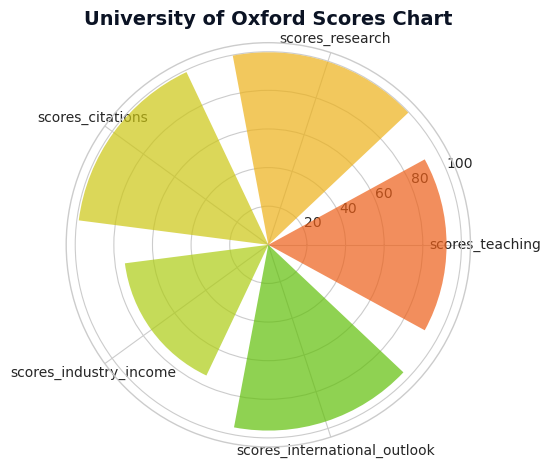

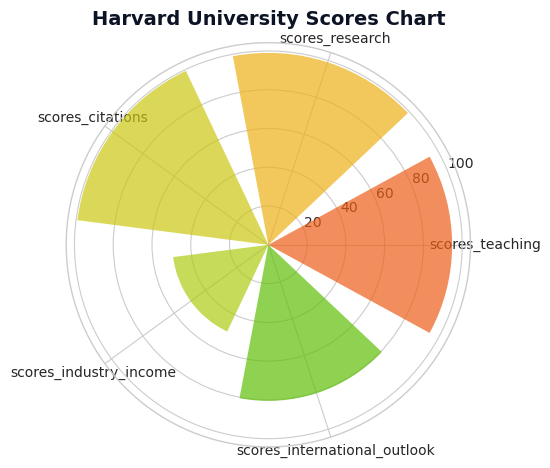

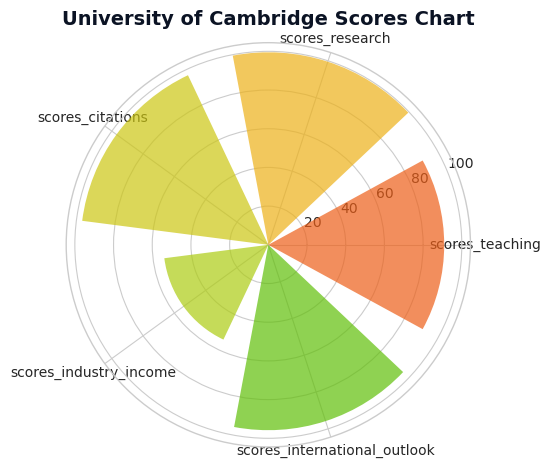

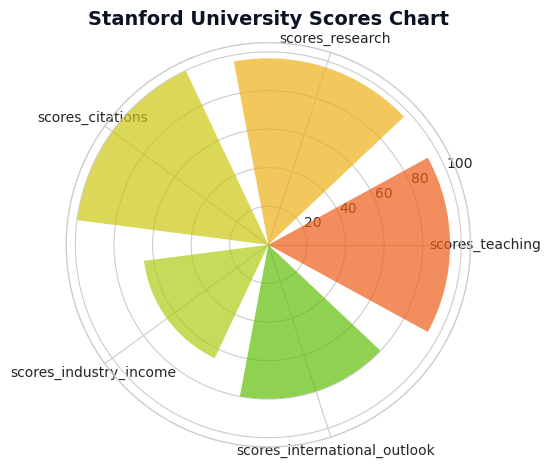

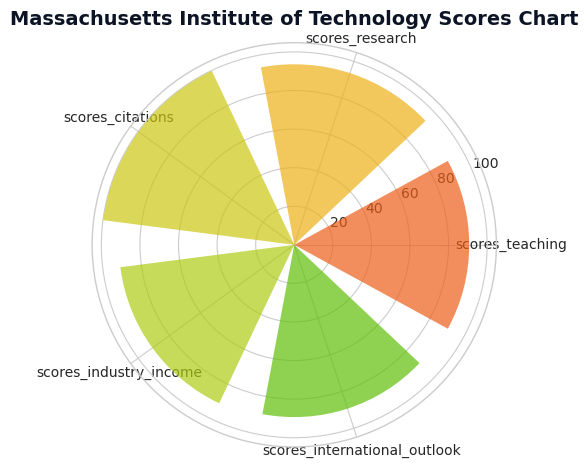

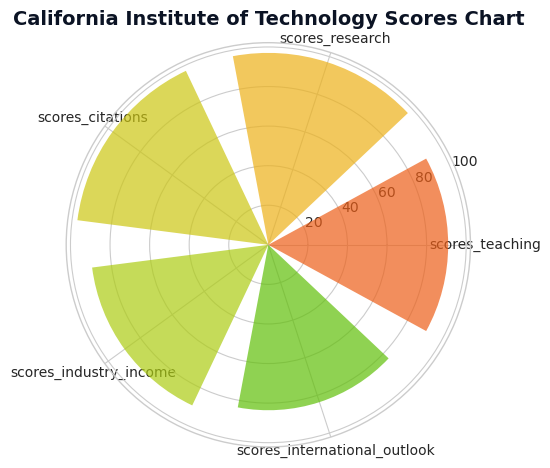

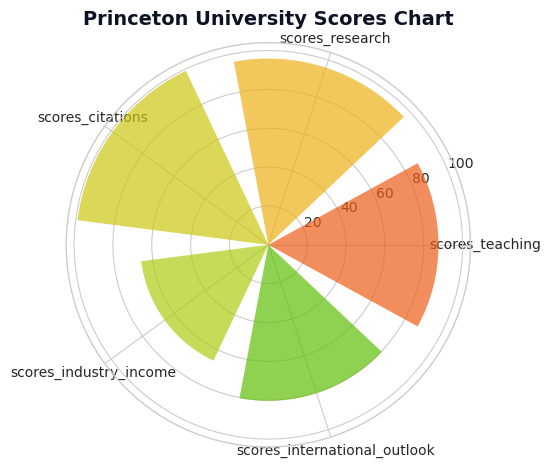

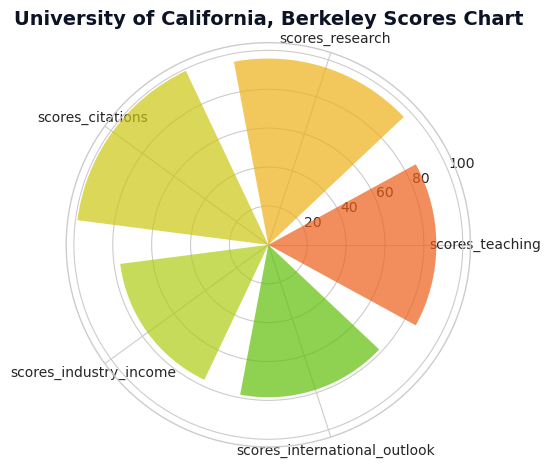

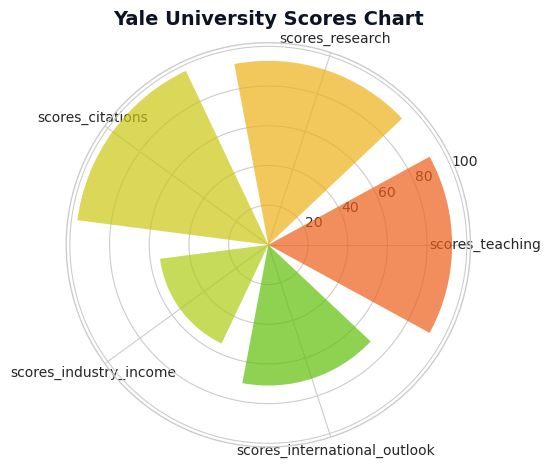

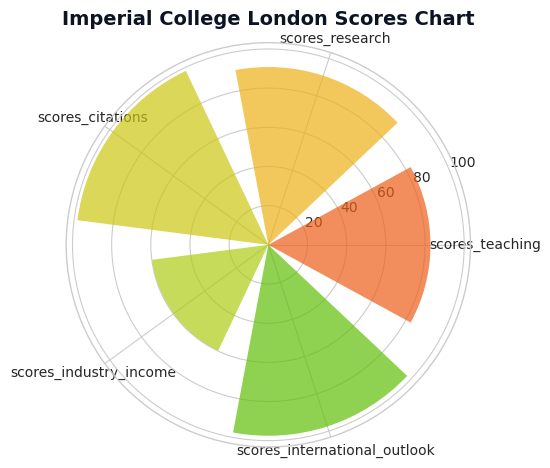

In [8]:
# loop through the dataframe to plot of scores of the each university
for idx, name in enumerate(uni_list):
    plot_radar_chart(name, idx)

# 4. How many students TOP Universities have had over period of last 5 years

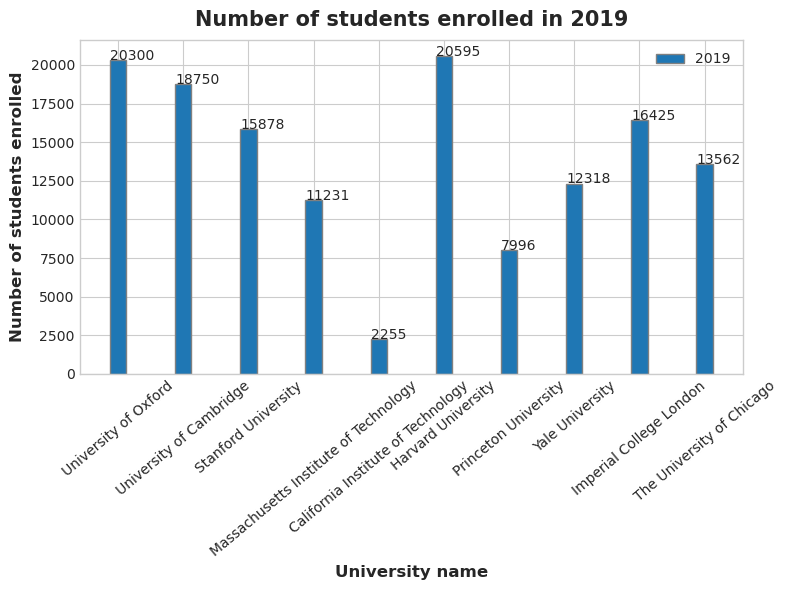

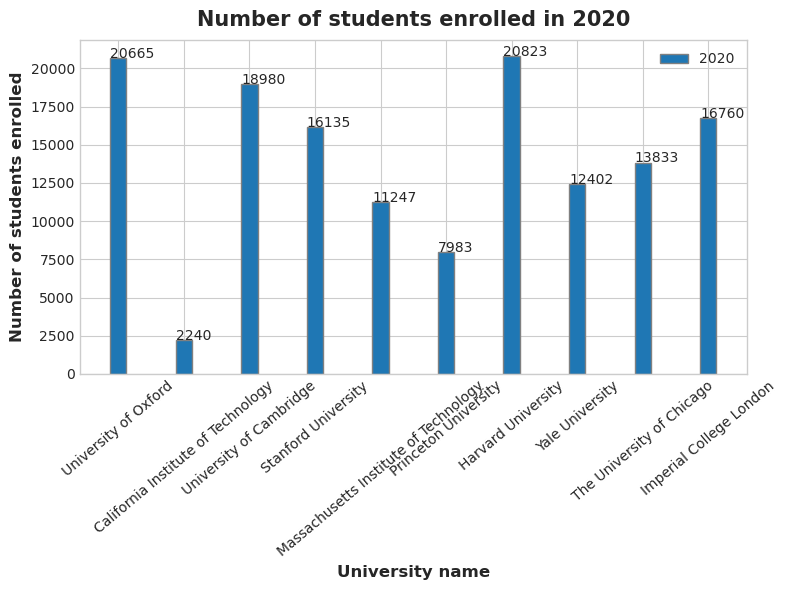

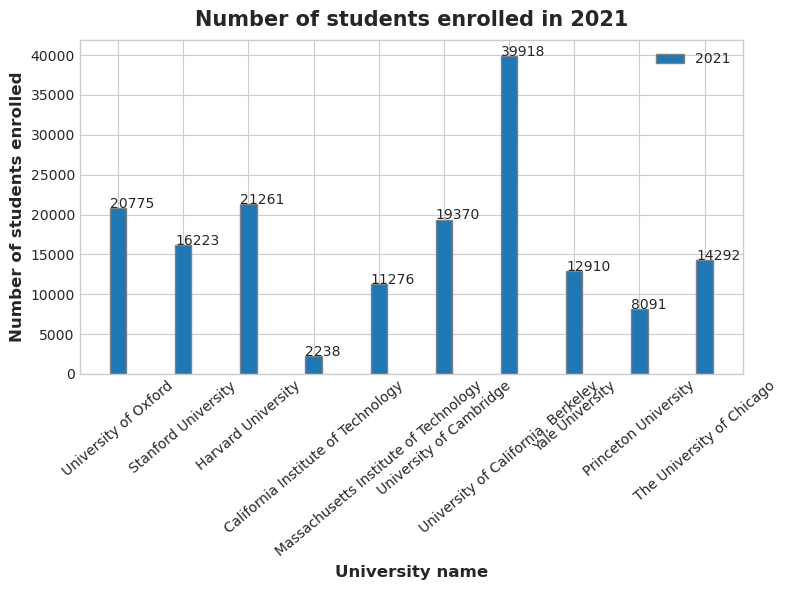

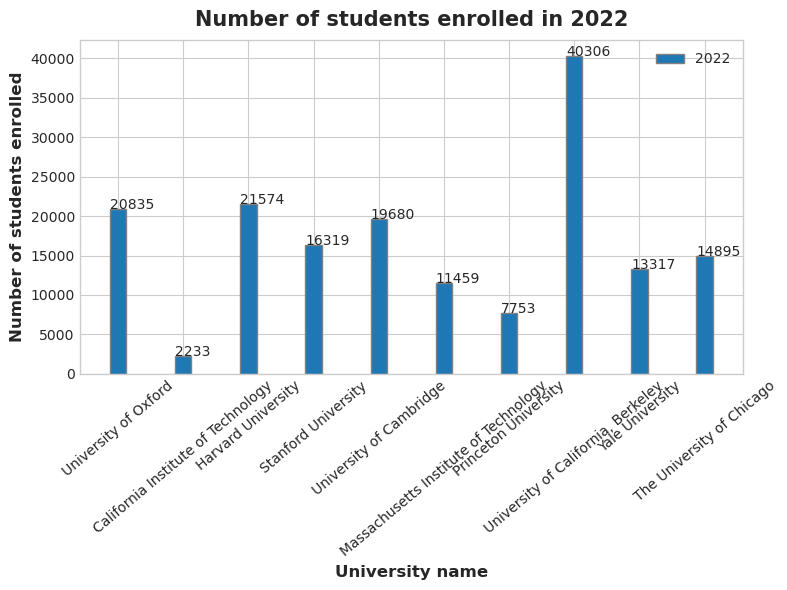

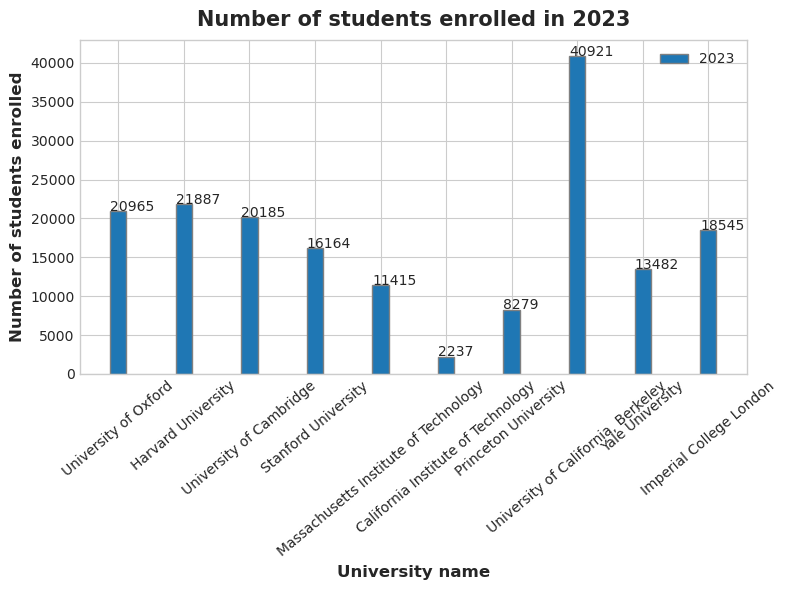

In [9]:
def students_count(df, year):
    """ A function to get sub-datafram of students count of the of Universities.
    
    args:
    df = input dataframe
    year = year of the analysis
    
    returns:
    sub-dataframe
    """
    studentdf = df[['name','stats_number_students']][:10]
    studentdf["year"] = year
    studentdf['stats_number_students'] = studentdf['stats_number_students'].str.replace(',','').astype("int64")
    return studentdf

student19 = students_count(df19, 2019)
student20 = students_count(df20, 2020)
student21 = students_count(df21, 2021)
student22 = students_count(df22, 2022)
student23 = students_count(df23, 2023)

# plot the figure
def students_plot(df, year):
    """ A function to plot the students count by top10 universities.
    
    args:
    df = input dataframe
    year = year of the analysis
    
    returns:
    matplotlib pyplot chart
    """
    fig, ax = plt.subplots(figsize=(8,6))
    ax.bar(x=df['name'], height=df['stats_number_students'], width=0.25, edgecolor='grey', label=year)
    ax.set_xlabel('University name', fontweight ='bold', fontsize = 12)
    ax.set_ylabel('Number of students enrolled', fontweight ='bold', fontsize = 12)
    ax.set_xticks(ticks=df['name'])
    ax.set_xticklabels(labels=df['name'], rotation=40)
    for p in ax.patches:
        ax.annotate(f"{p.get_height()}", (p.get_x(),p.get_height()+10))
    ax.legend()
    ax.set_title(f"Number of students enrolled in {year}",fontweight ='bold', fontsize = 15)
    plt.show()
    
students_plot(student19, 2019)
students_plot(student20, 2020)
students_plot(student21, 2021)
students_plot(student22, 2022)
students_plot(student23, 2023)

# 5. Let's look at the relation between Teaching and Ranking of the university with number of students

In [10]:
def tr_relationsdf(df, year):
    """ A function to get sub-datafram of scores across various metrics of Universities.
    
    args:
    df = input dataframe
    year = year of the analysis
    
    returns:
    sub-dataframe
    """
    trdf = df[['name','scores_teaching','scores_research','stats_number_students','stats_student_staff_ratio']][:20]
    trdf["year"] = year
    trdf['stats_number_students'] = trdf['stats_number_students'].str.replace(',','').astype("int64")
    return trdf

tr19 = tr_relationsdf(df19, 2019)
tr20 = tr_relationsdf(df20, 2020)
tr21 = tr_relationsdf(df21, 2021)
tr22 = tr_relationsdf(df22, 2022)
tr23 = tr_relationsdf(df23, 2023)

# plot the chart using chart function
def tr_relationchart(df, year):
    """ A function to plot teaching and rankings of the universities along with number of students.
    
    args:
    df = input dataframe
    year = year of the analysis
    
    returns:
    plotly figure
    """
    fig = px.scatter(df, 
                 x="scores_research", 
                 y="scores_teaching", 
                 color="stats_student_staff_ratio",
                 size='stats_number_students', 
                 hover_data=['name'],
                 title=f'How teaching and research relate with Students and staff in the year {year}?'
                 )
    fig.update_layout(xaxis_title='Research score',
                  yaxis_title='Teaching score',
                  title_font_family="Sitka Small",
                  title_font_color="green",
                  title_font_size=22,
                  xaxis_title_font_color='black',
                  xaxis_title_font_size=17,
                  yaxis_title_font_color='black',
                  yaxis_title_font_size=17,
                  legend_title='Student Staff Ratio'
                  )
    fig.show()
    
tr_relationchart(tr19, 2019)
tr_relationchart(tr20, 2020)
tr_relationchart(tr21, 2021)
tr_relationchart(tr22, 2022)
tr_relationchart(tr23, 2023)